# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

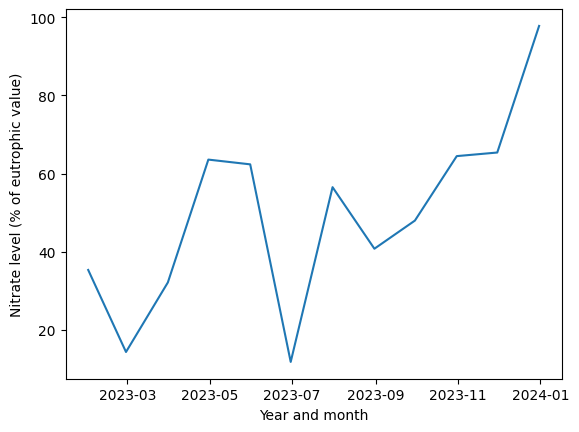

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

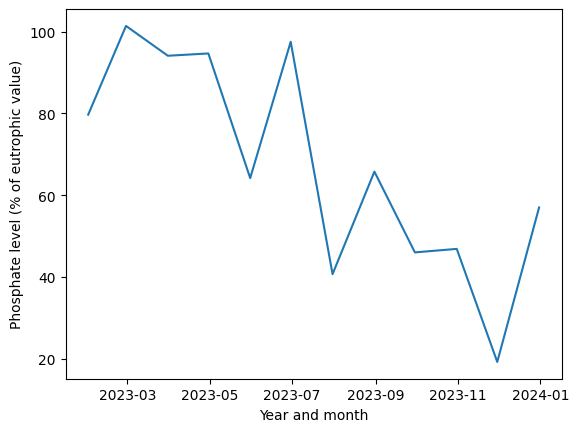

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

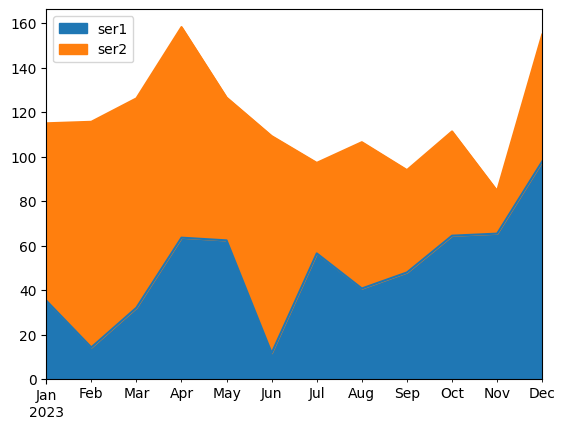

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [1]:
#imports and load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

emissions = pd.read_csv('emissions_medium_granularity.csv')
fuels     = pd.read_csv('all_fuels_data.csv')
pipelines = pd.read_csv('Oil_Pipeline.csv')

In [2]:
#Initial inspection & preprocessing
for df, name in [(emissions, 'Emissions'),
                 (fuels,     'All Fuels'),
                 (pipelines, 'Oil Pipelines')]:
    print(f"=== {name} ===")
    display(df.info())           # types, non-null counts
    display(df.head())           # quick glance at first rows
    print("Missing values:\n", df.isnull().sum(), "\n")

=== Emissions ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


None

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


Missing values:
 year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64 

=== All Fuels ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28075 entries, 0 to 28074
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28075 non-null  object 
 1   commodity  28075 non-null  object 
 2   date       28075 non-null  object 
 3   open       28075 non-null  float64
 4   high       28075 non-null  float64
 5   low        28075 non-null  float64
 6   close      28075 non-null  float64
 7   volume     28075 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


None

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


Missing values:
 ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64 

=== Oil Pipelines ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795 entries, 0 to 3794
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         3795 non-null   object 
 1   Supplemental Number                   2795 non-null   float64
 2   Accident Year                         3795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           3795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                3674 non-null   object 
 7   Pipeline Location                     3795 non-null   object 
 8   Pipeline Type                         3773 n

None

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Environmental Remediation Costs,Other Costs,All Costs,Pressure (psi),Temperature (°C),Flow Rate (barrels/day),Vibration Level (mm/s),Corrosion Level (mm/year),Last Maintenance Date,Авария
0,20100016,17305.0,2010,2010-01-01 07:15:00,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,0.0,1627,902.0,68.0,116820.0,1.3,0.5,2022-02-19,1.0
1,20100254,17331.0,2010,2010-01-04 08:30:00,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,0.0,4008,887.0,75.0,100263.0,2.4,0.3,2024-03-05,1.0
2,20100038,17747.0,2010,2010-01-05 10:30:00,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,0.0,200,1057.0,63.0,102955.0,2.9,0.3,2023-08-13,1.0
3,20100260,18574.0,2010,2010-01-06 19:30:00,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,0.0,11540,1076.0,72.0,93707.0,2.2,0.3,2024-02-09,1.0
4,20100030,16276.0,2010,2010-01-07 13:00:00,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,2000.0,0.0,29650,848.0,66.0,65658.0,1.8,0.4,2023-10-08,1.0


Missing values:
 Report Number                              0
Supplemental Number                     1000
Accident Year                              0
Accident Date/Time                      1000
Operator ID                                0
Operator Name                           1000
Pipeline/Facility Name                   121
Pipeline Location                          0
Pipeline Type                             22
Liquid Type                                0
Liquid Subtype                          2446
Liquid Name                             3573
Accident City                           1315
Accident County                         1075
Accident State                          1012
Accident Latitude                       1000
Accident Longitude                      1000
Cause Category                          1000
Cause Subcategory                       1000
Unintentional Release (Barrels)         1000
Intentional Release (Barrels)           2586
Liquid Recovery (Barrels)             

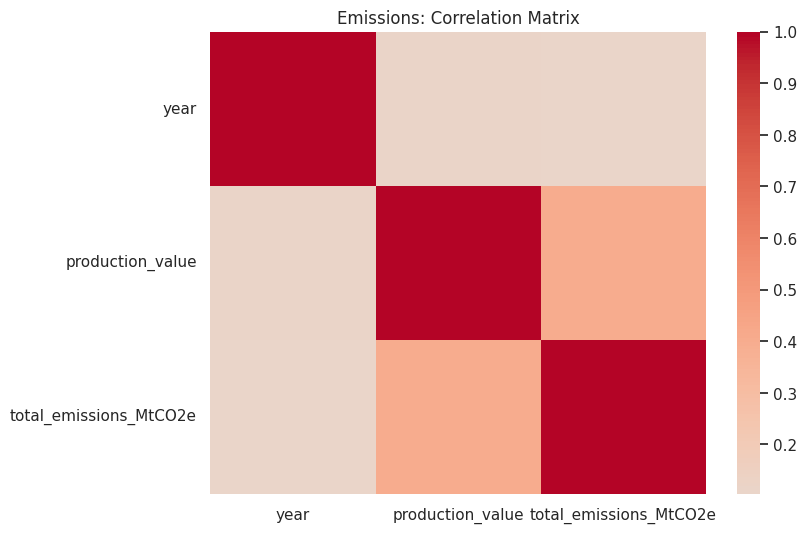

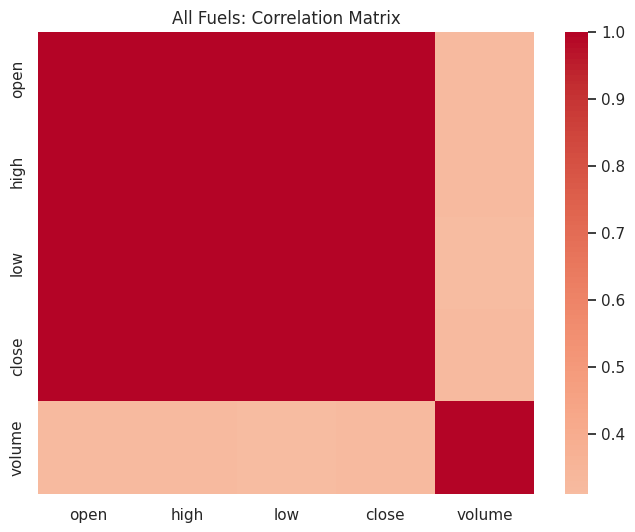

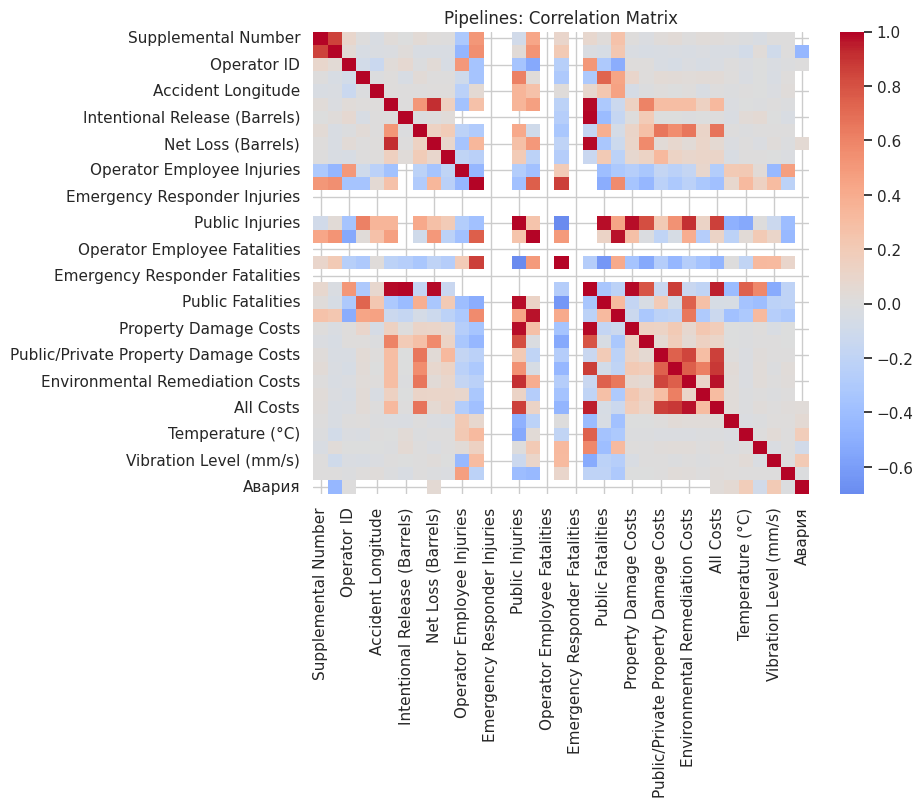

In [4]:
# bivariate correlations + heatmap
def plot_corr(df, title):
    num = df.select_dtypes(include=[np.number])
    corr = num.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()
    return corr

corr_em = plot_corr(emissions, "Emissions: Correlation Matrix")
corr_fuel = plot_corr(fuels, "All Fuels: Correlation Matrix")
corr_pipe = plot_corr(pipelines, "Pipelines: Correlation Matrix")

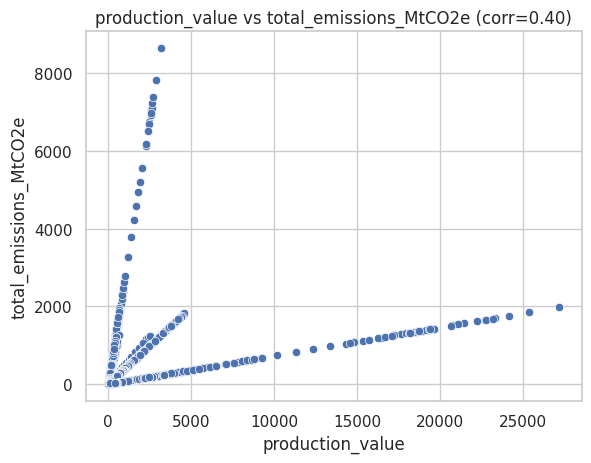

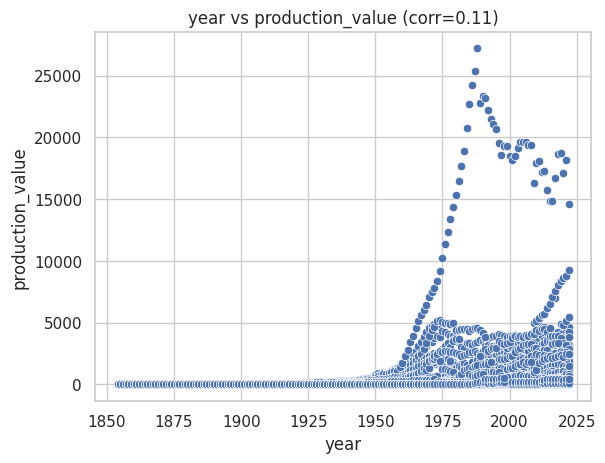

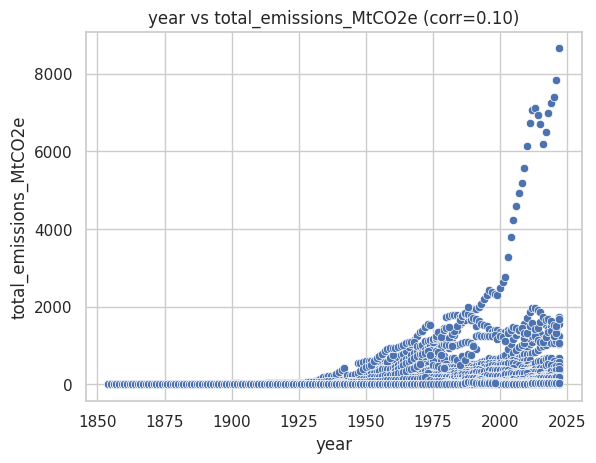

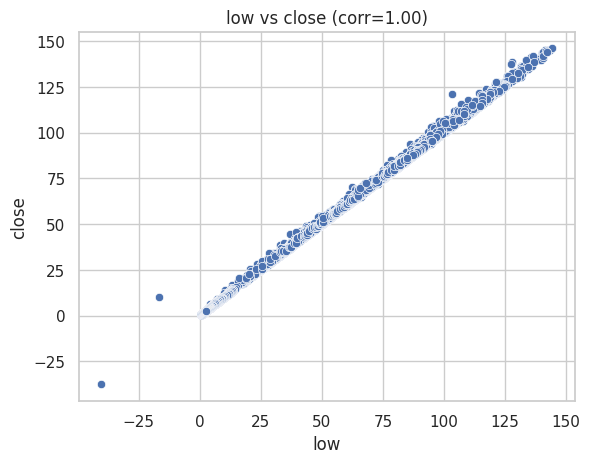

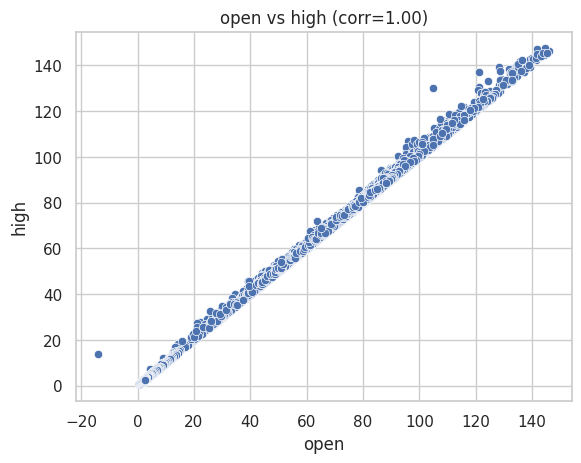

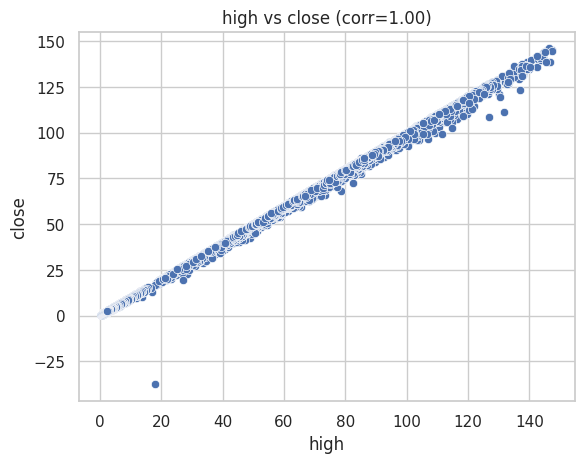

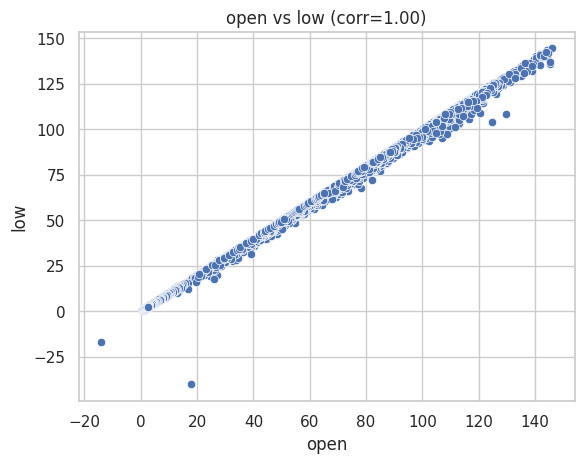

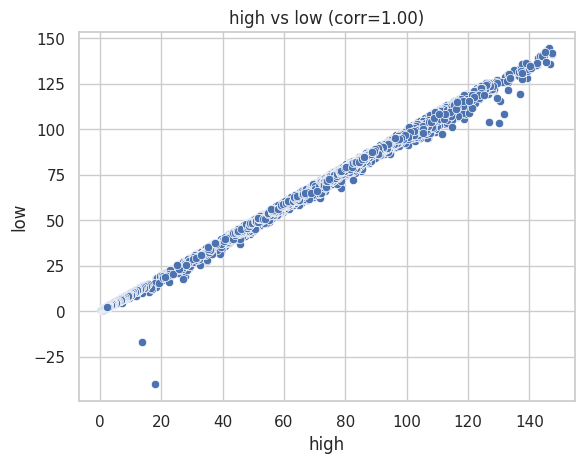

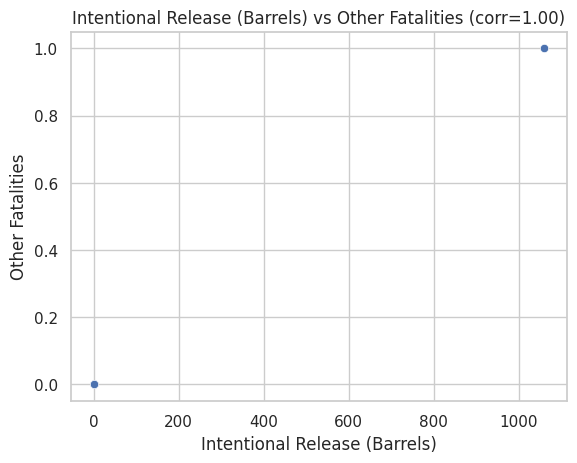

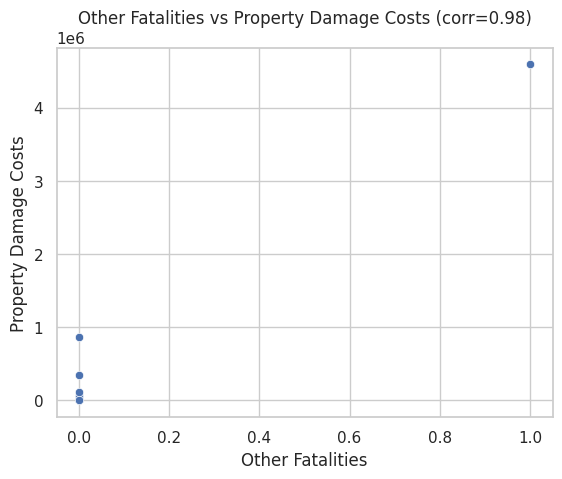

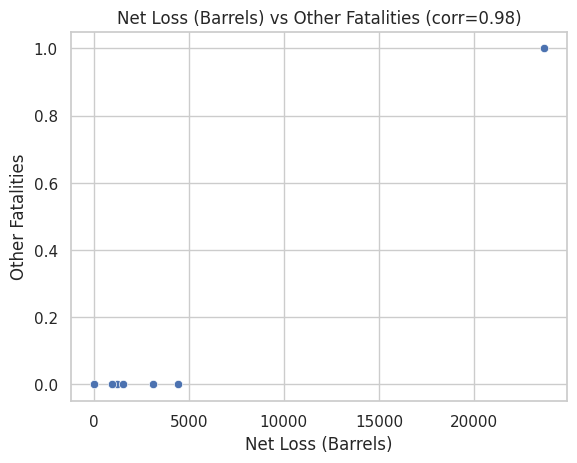

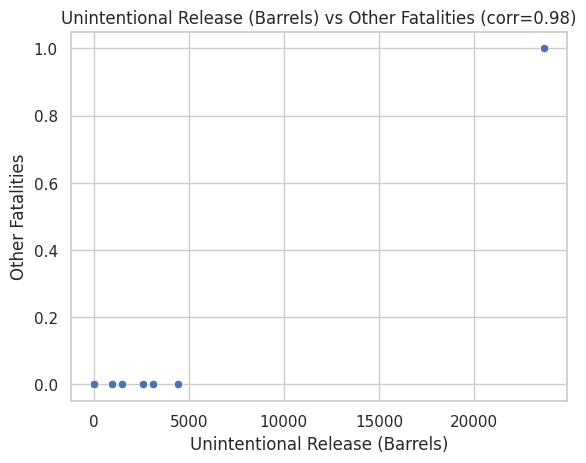

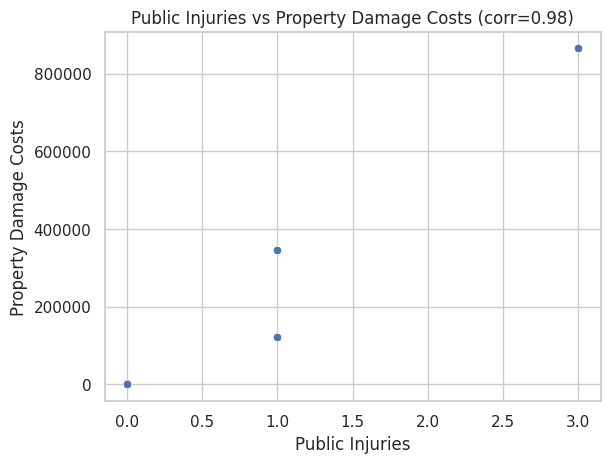

In [5]:
# scatterplots for top correlated pairs
def scatter_top_pairs(df, corr, top_n=5):
    # flatten, remove self-correlations, sort
    pairs = (corr
             .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
             .stack()
             .sort_values(ascending=False)
             .head(top_n))
    for (x, y), val in pairs.items():
        plt.figure()
        sns.scatterplot(data=df, x=x, y=y)
        plt.title(f"{x} vs {y} (corr={val:.2f})")
        plt.show()

scatter_top_pairs(emissions, corr_em)
scatter_top_pairs(fuels,     corr_fuel)
scatter_top_pairs(pipelines, corr_pipe)

/tmp/ipykernel_29400/3972505259.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.select_dtypes(include=[np.number]).resample('M').mean()


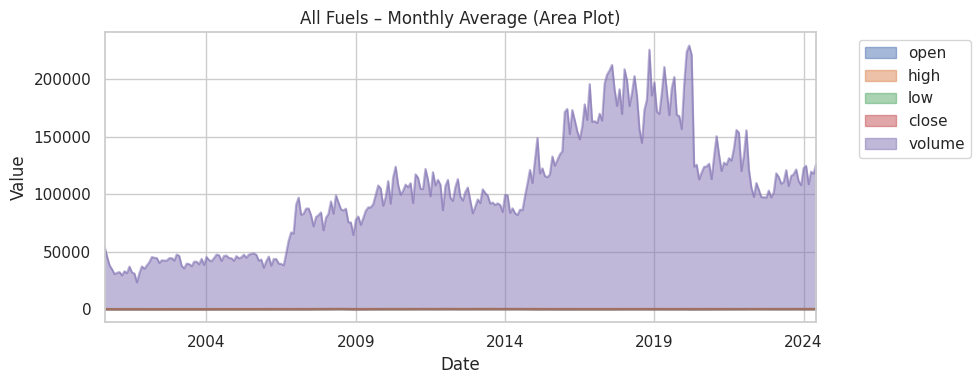

In [8]:
# Time-series line/area plots (if you have a date column)

for df, name in [(emissions, 'Emissions'), (fuels, 'All Fuels')]:
    if 'date' in df.columns.str.lower():
        # try to infer the date column
        date_col = [c for c in df.columns if 'date' in c.lower()][0]
        df[date_col] = pd.to_datetime(df[date_col])
        df.set_index(date_col, inplace=True)
        
        # plot each numeric column as a monthly average
        monthly = df.select_dtypes(include=[np.number]).resample('M').mean()
        monthly.plot.area(figsize=(10,4), alpha=0.5)
        plt.title(f"{name} – Monthly Average (Area Plot)")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # reset index
        df.reset_index(inplace=True)

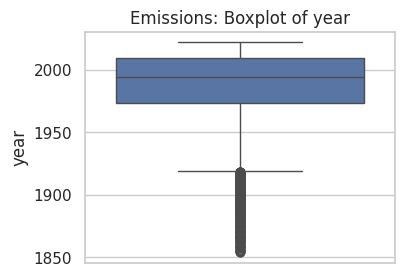

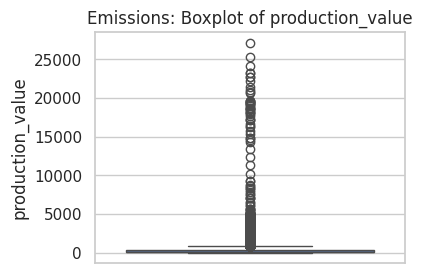

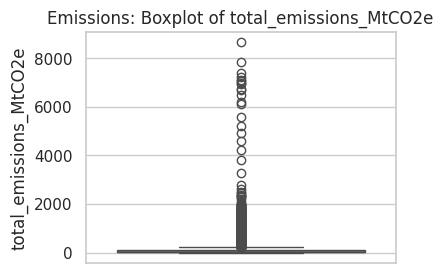

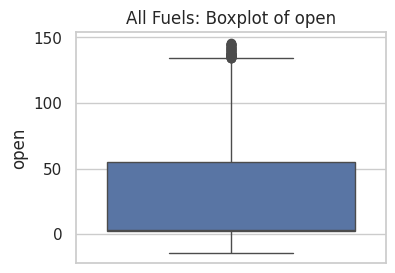

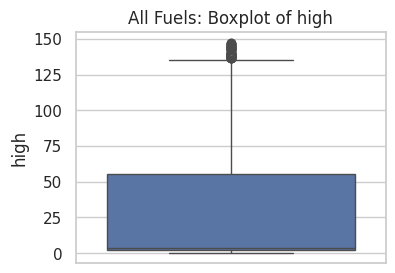

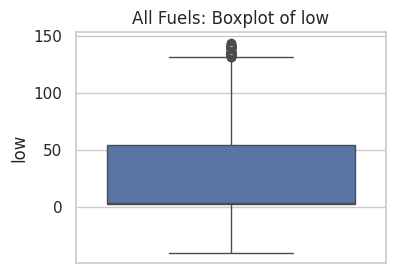

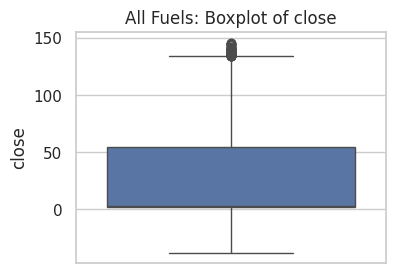

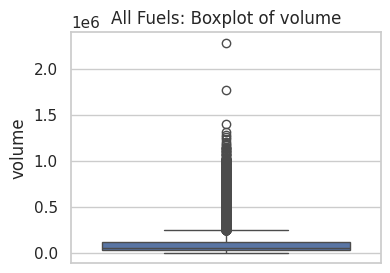

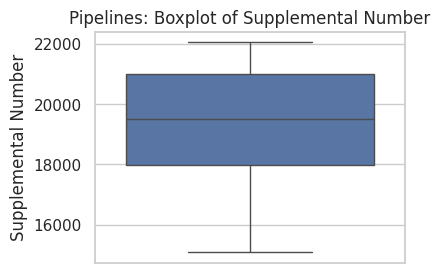

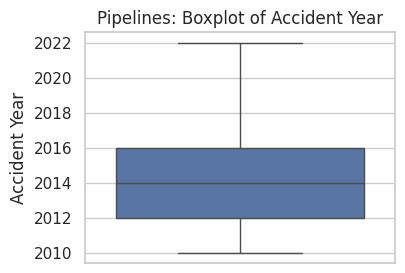

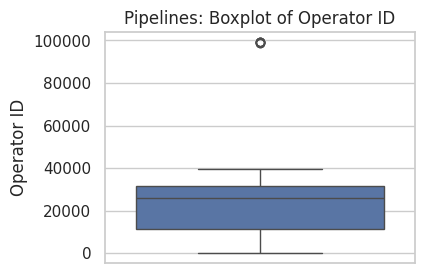

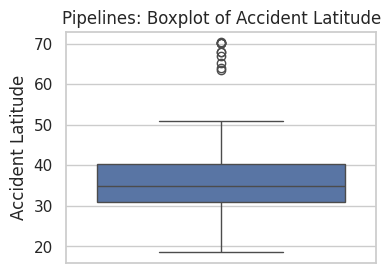

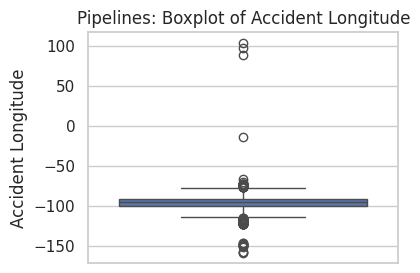

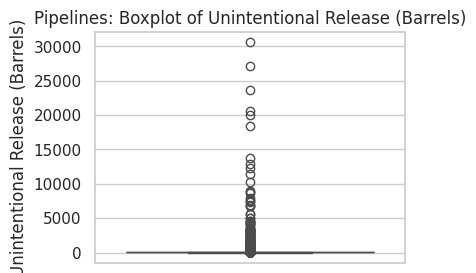

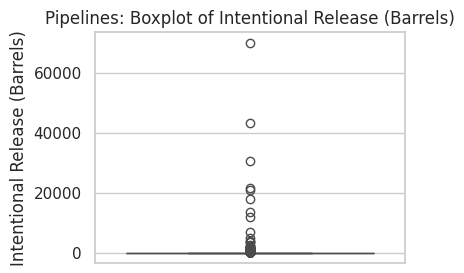

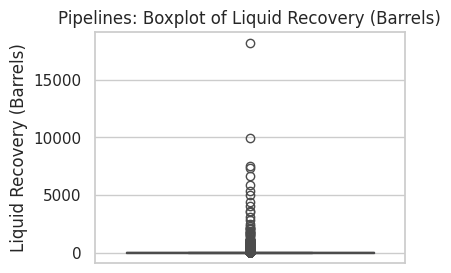

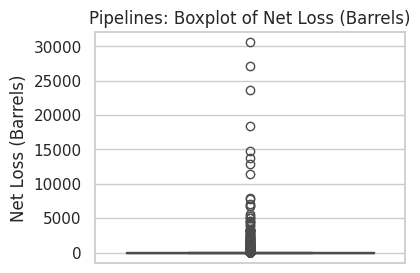

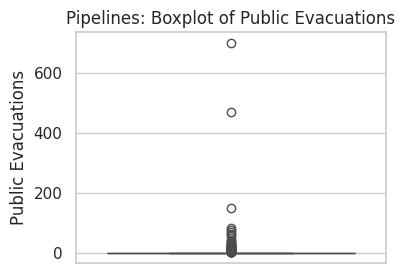

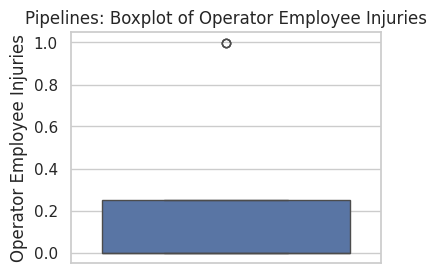

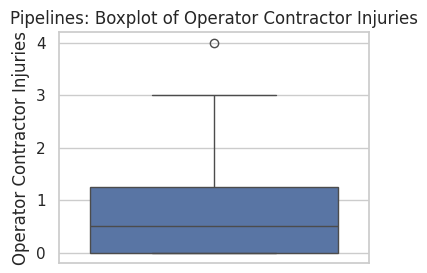

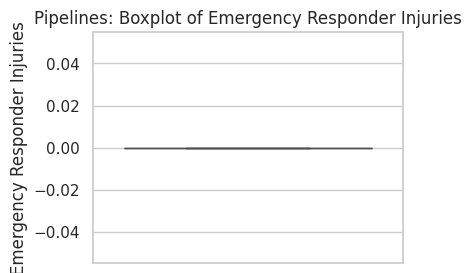

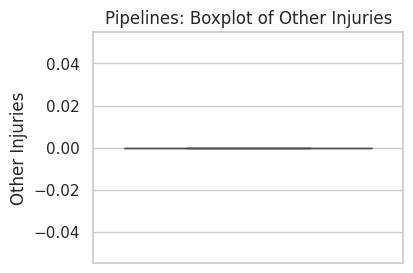

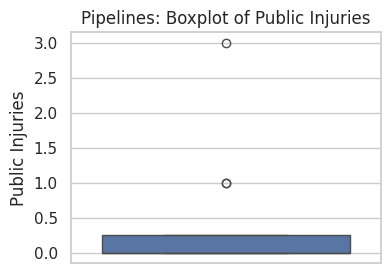

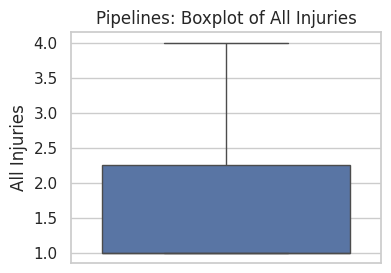

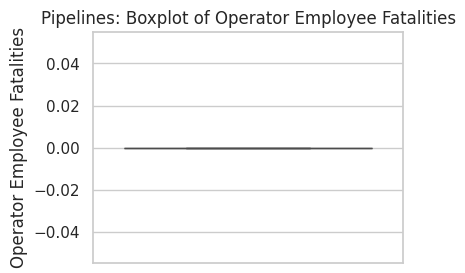

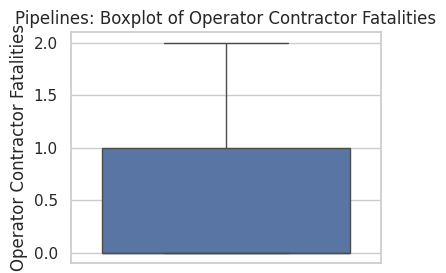

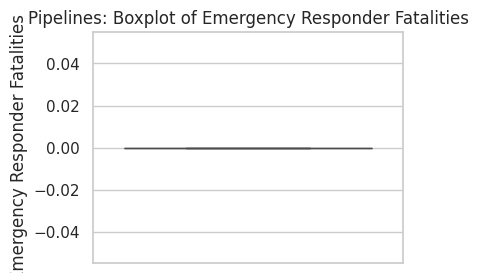

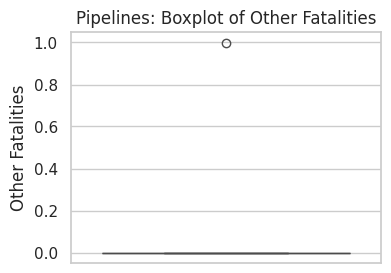

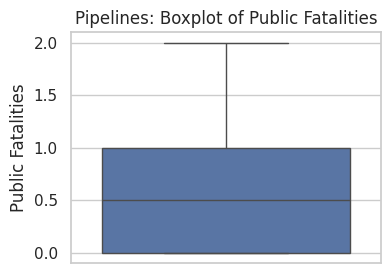

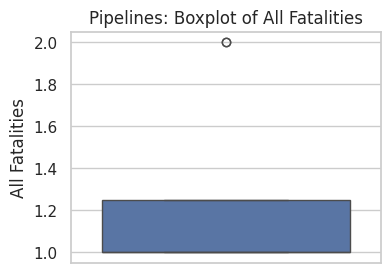

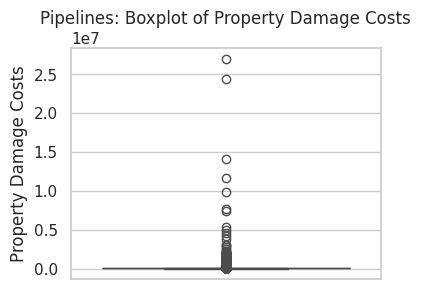

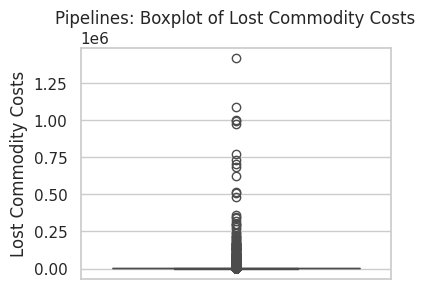

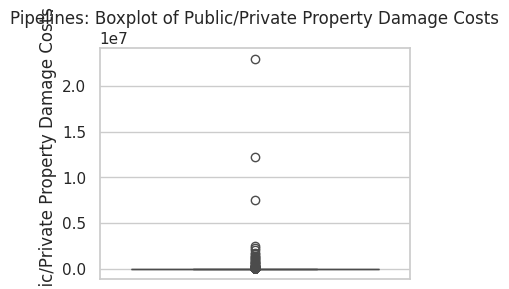

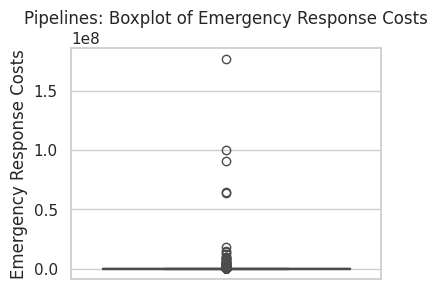

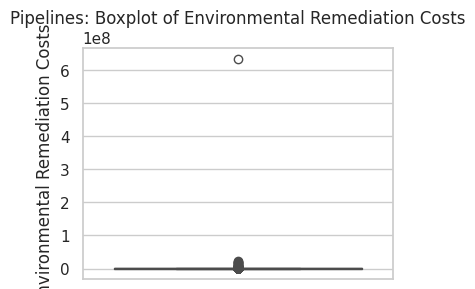

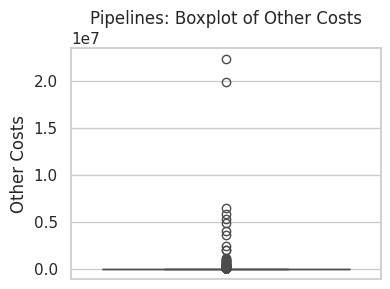

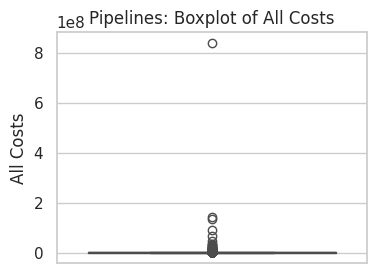

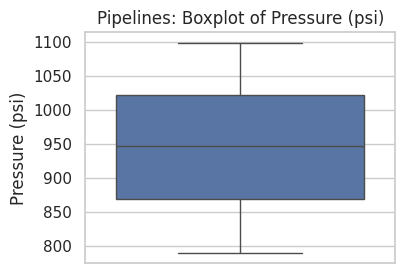

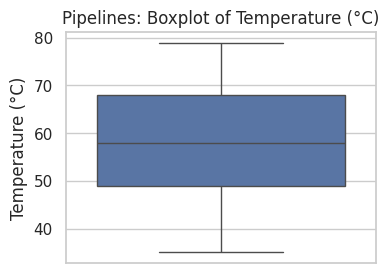

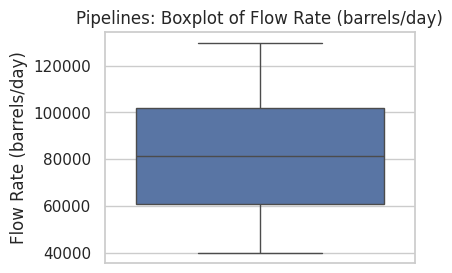

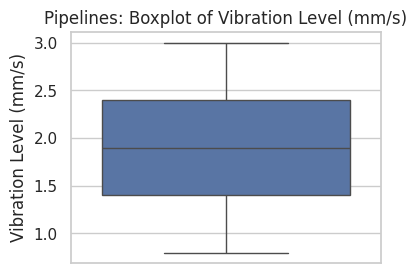

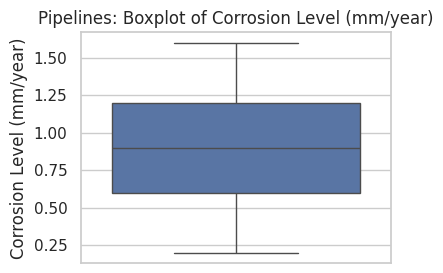

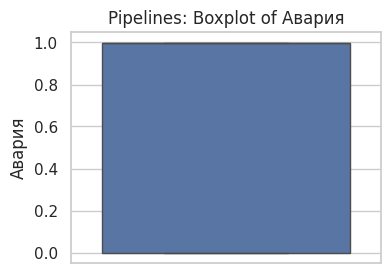

In [9]:
# Outlier detection via boxplots
for df, name in [(emissions, 'Emissions'),
                 (fuels,     'All Fuels'),
                 (pipelines, 'Pipelines')]:
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        plt.figure(figsize=(4,3))
        sns.boxplot(y=df[col].dropna())
        plt.title(f"{name}: Boxplot of {col}")
        plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

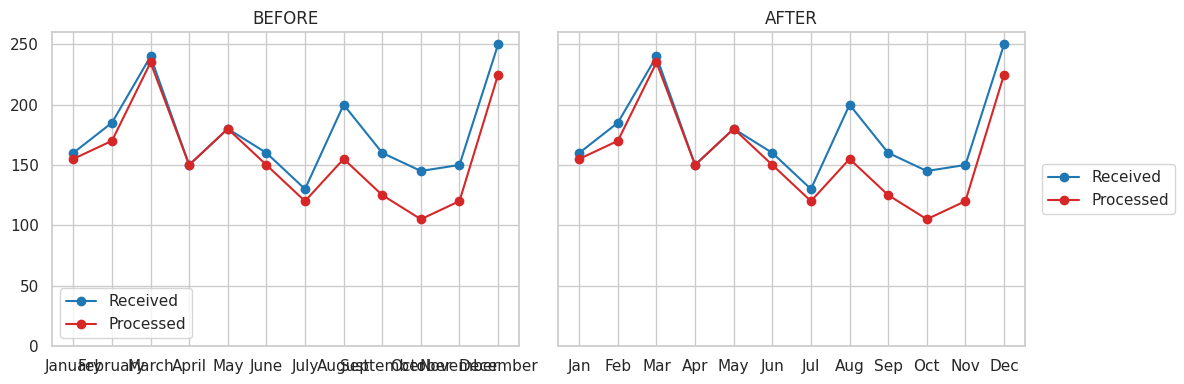

In [12]:
# 1) Data
months_full = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
months_abbr = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
received  = [160, 185, 240, 150, 180, 160, 130, 200, 160, 145, 150, 250]
processed = [155, 170, 235, 150, 180, 150, 120, 155, 125, 105, 120, 225]

# 2) Set up the figure with 2 side-by-side axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# 3) BEFORE plot (full month names, inline legend)
x1 = range(len(months_full))
ax1.plot(x1, received,  marker='o', label='Received',  color='tab:blue')
ax1.plot(x1, processed, marker='o', label='Processed', color='tab:red')
ax1.set_title("BEFORE")
ax1.set_xticks(x1)
ax1.set_xticklabels(months_full, rotation=0)
ax1.set_yticks([0, 50, 100, 150, 200, 250])
ax1.set_ylim(0, 260)
ax1.legend()

# 4) AFTER plot (abbreviated months, legend outside)
x2 = range(len(months_abbr))
ax2.plot(x2, received,  marker='o', label='Received',  color='tab:blue')
ax2.plot(x2, processed, marker='o', label='Processed', color='tab:red')
ax2.set_title("AFTER")
ax2.set_xticks(x2)
ax2.set_xticklabels(months_abbr, rotation=0)
ax2.set_yticks([0, 50, 100, 150, 200, 250])
ax2.set_ylim(0, 260)

# move legend to the right of the second plot
ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

# 5) Layout tweak
plt.tight_layout()
plt.show()